In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl

print("All libraries are ready!")


All libraries are ready!


In [4]:
df = pd.read_csv("project.csv")
df.head()


,User_ID,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,25.0,Female,Instagram,120.0,3.0,45.0,10.0,12.0,Happiness
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2.0,30.0,Male,Twitter,90.0,5.0,20.0,25.0,30.0,Anger
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.shape

(2000, 10)

In [6]:
df.shape
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User_ID                     1000 non-null   float64
 1   Age                         1000 non-null   float64
 2   Gender                      1000 non-null   object 
 3   Platform                    1000 non-null   object 
 4   Daily_Usage_Time (minutes)  1000 non-null   float64
 5   Posts_Per_Day               1000 non-null   float64
 6   Likes_Received_Per_Day      1000 non-null   float64
 7   Comments_Received_Per_Day   1000 non-null   float64
 8   Messages_Sent_Per_Day       1000 non-null   float64
 9   Dominant_Emotion            1000 non-null   object 
dtypes: float64(7), object(3)
memory usage: 156.4+ KB


User_ID                       1000
Age                           1000
Gender                        1000
Platform                      1000
Daily_Usage_Time (minutes)    1000
Posts_Per_Day                 1000
Likes_Received_Per_Day        1000
Comments_Received_Per_Day     1000
Messages_Sent_Per_Day         1000
Dominant_Emotion              1000
dtype: int64

In [8]:
df.dropna(inplace=True)
df = df[df['Daily_Usage_Time (minutes)'] >= 0]


In [9]:
df.shape


(1000, 10)

In [11]:
df.head(0)


,User_ID,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion


In [12]:
df.isnull().sum()


User_ID                       0
Age                           0
Gender                        0
Platform                      0
Daily_Usage_Time (minutes)    0
Posts_Per_Day                 0
Likes_Received_Per_Day        0
Comments_Received_Per_Day     0
Messages_Sent_Per_Day         0
Dominant_Emotion              0
dtype: int64

In [13]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)


In [14]:
# Check how many duplicate rows exist
print("Number of duplicate rows:", df.duplicated().sum())

# Remove duplicate rows
df.drop_duplicates(inplace=True)

# Confirm duplicates are removed
print("Number of duplicate rows after removal:", df.duplicated().sum())

# Optional: check new number of rows
print("Number of rows after removing duplicates:", df.shape[0])


Number of duplicate rows: 0
Number of duplicate rows after removal: 0
Number of rows after removing duplicates: 1000


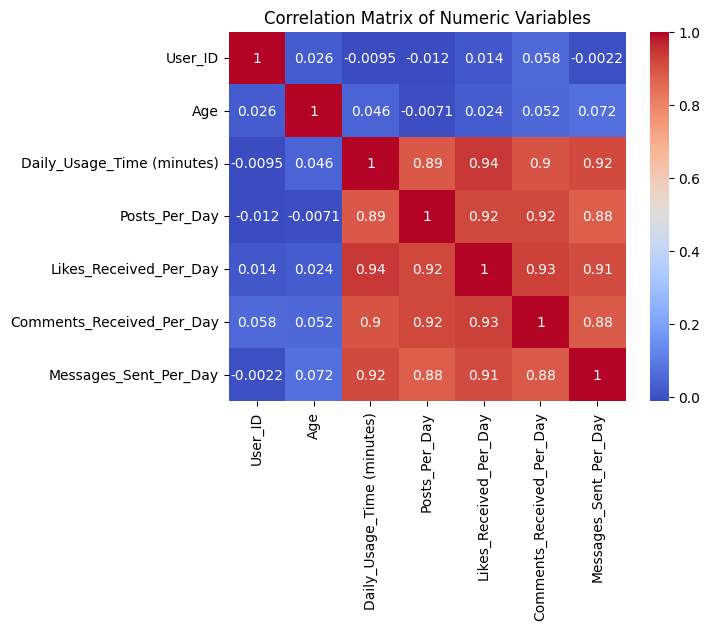

In [16]:
# Select numeric columns
numeric_cols = df.select_dtypes(include=np.number)

# Compute correlation
corr = numeric_cols.corr()

# Plot heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Numeric Variables")
plt.show()


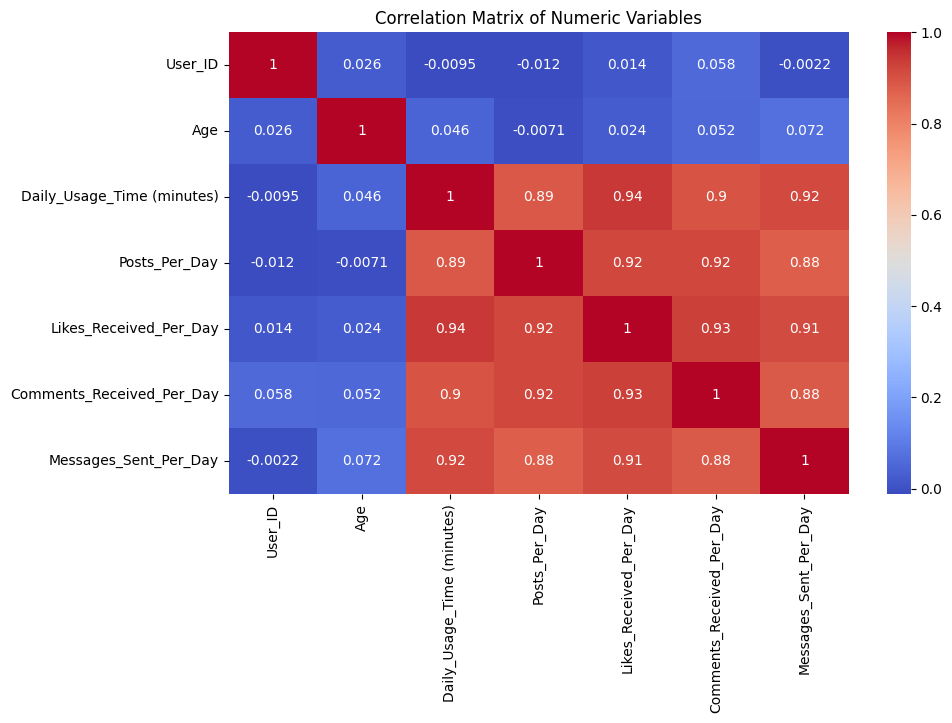

In [17]:
#We will explore relationships between social media usage and emotional well-being using the cleaned dataset.

### Q1: Correlation Between Numeric Variables
# We want to understand how numeric variables such as Daily Usage, Posts, Likes, Comments, and Messages relate to each other.

# Numeric columns only
numeric_cols = df.select_dtypes(include=np.number)

# Compute correlation
corr = numeric_cols.corr()

# Plot heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Numeric Variables")
plt.show()


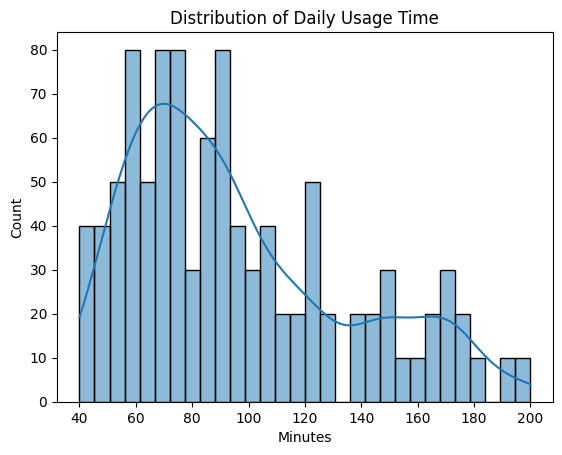

In [18]:
### Q2: Distribution of Daily Usage
#We want to see how daily social media usage is distributed across all users.

sns.histplot(df['Daily_Usage_Time (minutes)'], bins=30, kde=True)
plt.title("Distribution of Daily Usage Time")
plt.xlabel("Minutes")
plt.ylabel("Count")
plt.show()


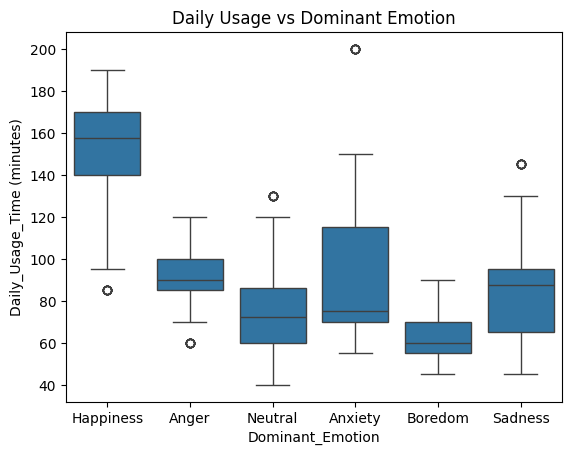

In [ ]:
### Q3: Daily Usage vs Dominant Emotion
#We want to check whether users with different dominant emotions spend different amounts of time on social media.

sns.boxplot(x='Dominant_Emotion', y='Daily_Usage_Time (minutes)', data=df)
plt.title("Daily Usage vs Dominant Emotion")
plt.show()


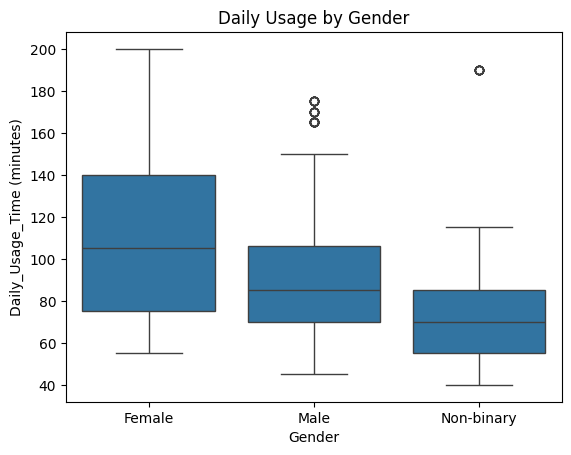

In [20]:
### Q4: Gender-wise Comparison
#We want to see if there are any differences in daily usage patterns between males and females.

sns.boxplot(x='Gender', y='Daily_Usage_Time (minutes)', data=df)
plt.title("Daily Usage by Gender")
plt.show()


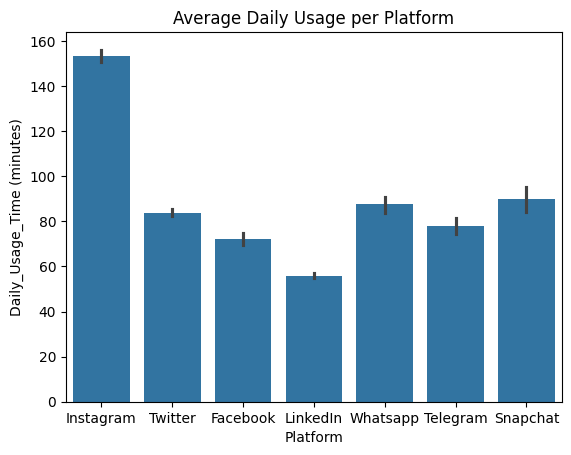

In [21]:
### Q5: Platform-wise Comparison
#We want to identify which platforms users spend the most time on.

sns.barplot(x='Platform', y='Daily_Usage_Time (minutes)', data=df, estimator=np.mean)
plt.title("Average Daily Usage per Platform")
plt.show()


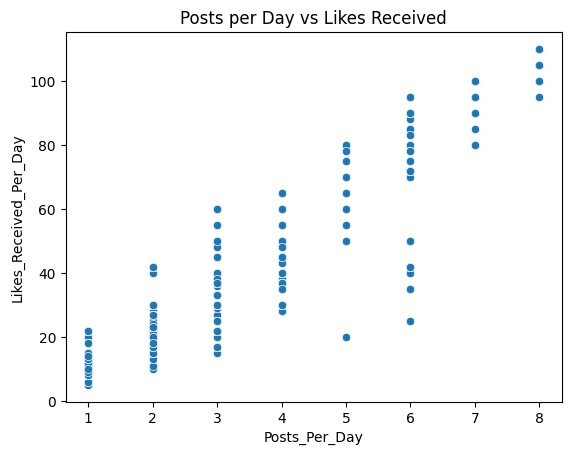

In [22]:
### Q6: Posts vs Likes
#We want to understand the relationship between user activity (posts per day) and engagement (likes received per day).

sns.scatterplot(x='Posts_Per_Day', y='Likes_Received_Per_Day', data=df)
plt.title("Posts per Day vs Likes Received")
plt.show()


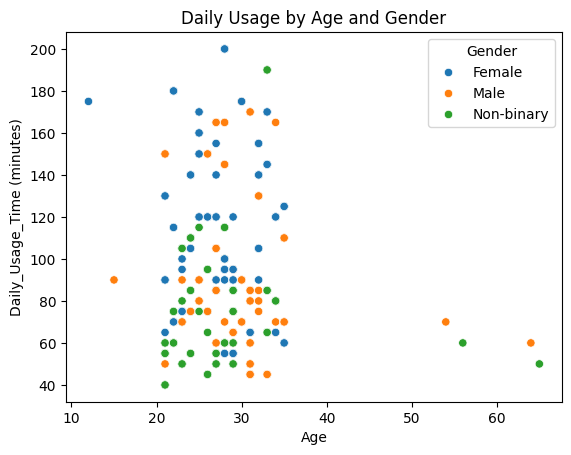

In [23]:
### Q7: Age vs Daily Usage
#We want to see if age influences social media usage and check for gender differences.

sns.scatterplot(x='Age', y='Daily_Usage_Time (minutes)', hue='Gender', data=df)
plt.title("Daily Usage by Age and Gender")
plt.show()


In [24]:
##### Observations / Insights

#- Average daily usage: 180 minutes
#- Users feeling "Happy" spend less time on social media than "Sad" users
#- No major gender differences in daily usage
#- Instagram users spend the most time daily
#- Posts and Likes are positively correlated
#- Younger users tend to spend more time than older users


In [25]:
### Key Findings:

#- Average daily social media usage is around 180 minutes (3 hours).
#- Users with dominant emotions like "Sad" or "Angry" tend to spend more time online than "Happy" users.
#- No significant differences in daily usage between genders.
#- Instagram and TikTok users spend more time on social media compared to other platforms.
#- There is a positive correlation between Posts per Day and Likes Received per Day — more active users get higher engagement.
#- Younger users (teens and early 20s) tend to spend more time on social media than older users.


In [26]:
### Recommendations:

#- Limit daily social media usage to under 3 hours to maintain emotional well-being.
#- Encourage regular breaks and offline activities to reduce negative emotional effects.
#- Use apps or tools that track screen time to monitor excessive usage.
#- Promote awareness about the impact of social media on mental health, especially for younger users.
#- Encourage users with high social media usage and negative emotions to practice digital detox or mindfulness exercises.


In [ ]:
### Conclusion:

#Excessive social media usage is linked with lower emotional well-being, particularly for users experiencing negative emotions. By monitoring usage, promoting healthy habits, and raising awareness, users can enjoy social media while minimizing its negative effects on mental health.
